In [2]:
# import pandas as pd
# import numpy as np
import seaborn as sns, numpy as np, pandas as pd
import snoop
from pprint import pprint as print
# import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('seaborn-whitegrid')
pd.set_option("display.width", 5000)
pd.set_option("display.max_columns", 60)
plt.rcParams["figure.figsize"] = (15, 10)

%load_ext snoop
# %config InlineBackend.figure_format = 'retina'
%config InlineBackend.figure_format = 'svg' 

# from pylab import rcParams
# rcParams['figure.figsize'] = 10, 7

# show all output not only the last result
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.simplefilter('ignore')

The snoop extension is already loaded. To reload it, use:
  %reload_ext snoop


In [3]:
df = pd.read_csv(
    "/Users/glebsokolov/HeadRepo/DataSets/Тестовое Аналитик КМ.csv", sep=";"
)
df = df[df.columns[:9]]


Нужно провести анализ данных (файл во вложении), сравнить положение Игрока 1 и Игрока 2 на рынке недвижимости в разбивке:
- регионов 
- типов сделки
- категории недвижимости
- сегментов клиентов (owner, SMB, АН)
- в динамике

In [3]:
df.groupby(["Компания", "Регион"]).sum()["Контент"]
df.groupby(["Компания", "Тип сделки"]).sum()["Контент"]
df.groupby(["Компания", "Категория недвижимости"]).sum()["Контент"]
df.groupby(["Компания", "Категория"]).sum()["Контент"]


Компания  Регион         
Игрок 1   Воронеж             2925955
          Екатеринбург        2502645
          Казань              2263792
          Краснодар           4455822
          Москва              6184720
          Нижний Новгород     2995311
          Новосибирск         3778605
          Ростов-на-Дону      1759930
          Самара              2213956
          Санкт-Петербург     6557718
          Севастополь         1832939
          Сочи                6304744
          Тюмень              3749268
          Уфа                 1829984
          Челябинск           2364751
Игрок 2   Воронеж             2029411
          Екатеринбург        1232868
          Казань              3764871
          Краснодар           3221042
          Красноярск          1550436
          Москва              6840098
          Нижний Новгород     1765546
          Новосибирск         3561386
          Ростов-на-Дону      3265245
          Самара              1552518
          Санкт-Петербур

Компания  Тип сделки
Игрок 1   Аренда        13571578
          Продажа       38148562
Игрок 2   Аренда         9849802
          Продажа       42065744
Name: Контент, dtype: int64

Компания  Категория недвижимости
Игрок 1   Городская                 37555979
          Загородная                14164161
Игрок 2   Городская                 44310770
          Загородная                 7604776
Name: Контент, dtype: int64

Компания  Категория                  
Игрок 1   Большое агенство (201-1000)     7906778
          Крупное агенство (1000+)        2872452
          Крупный маклер (4-9)            4102929
          Малое агенство (10-50)          5154162
          Собственник (1)                20132222
          Среднее агенство (51-200)       5440261
          Частный маклер (2-3)            6111336
Игрок 2   Большое агенство (201-1000)    10649694
          Крупное агенство (1000+)       13309746
          Крупный маклер (4-9)            3958370
          Малое агенство (10-50)          6088675
          Собственник (1)                 7878757
          Среднее агенство (51-200)       7166908
          Частный маклер (2-3)            2863396
Name: Контент, dtype: int64

In [4]:
# '2018' in df['Неделя'][0]
df["Неделя"] = df["Неделя"].apply(lambda x: pd.to_datetime(x.split()[1]))


<AxesSubplot:xlabel='Неделя'>

<AxesSubplot:xlabel='Неделя'>

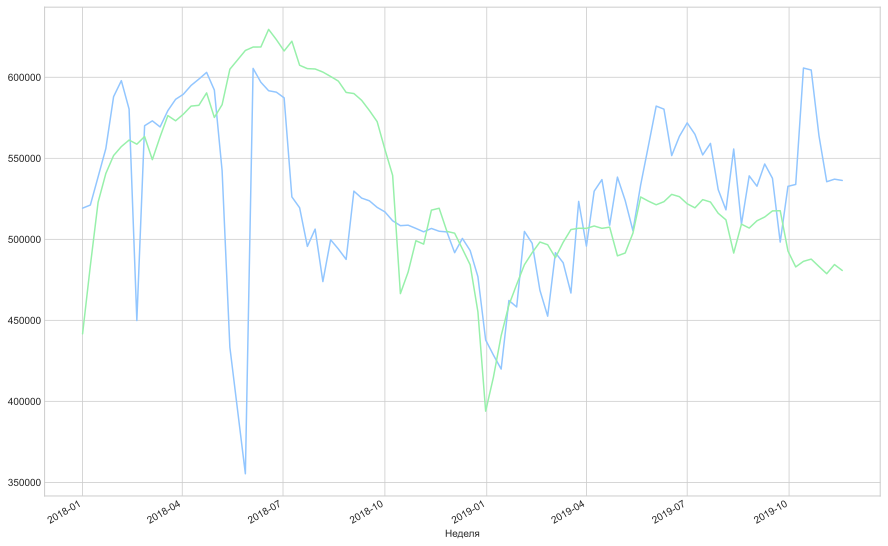

In [12]:
df.groupby(["Компания", "Неделя"]).sum()["Контент"]["Игрок 1"].plot()
df.groupby(["Компания", "Неделя"]).sum()["Контент"]["Игрок 2"].plot()


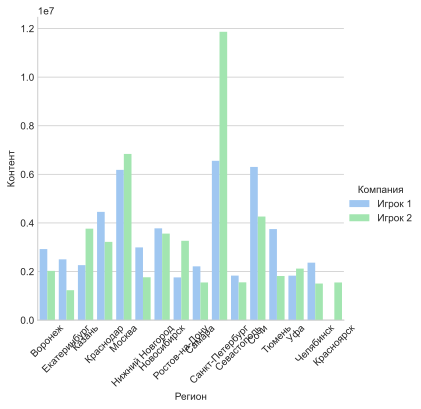

In [55]:
# sns.displot((df.groupby(['Компания', 'Регион']).sum()['Контент']), x='Контент', hue='Регион')
# sns.displot(
#     df.groupby(["Компания", "Регион"], as_index=False).sum()[
#         ["Компания", "Регион", "Контент"]
#     ],
#     x="Контент",
#     hue="Регион",
#     multiple='dodge'
# )
# sns.displot(
#     df.groupby(["Компания", "Регион"], as_index=False).sum()[
#         ["Компания", "Регион", "Контент"]
#     ],
#     x="Контент",
#     col='Компания'
# )

gg = df.groupby(["Компания", "Регион"],
                as_index=False).sum()[["Компания", "Регион", "Контент"]]
# g = sns.catplot(x="Регион", y="Контент", col="Компания", data=gg, kind='bar')
g = sns.catplot(x="Регион", y="Контент", hue="Компания", data=gg, kind='bar')

# plt.xticks(rotation=45)
g.set_xticklabels(rotation=45)


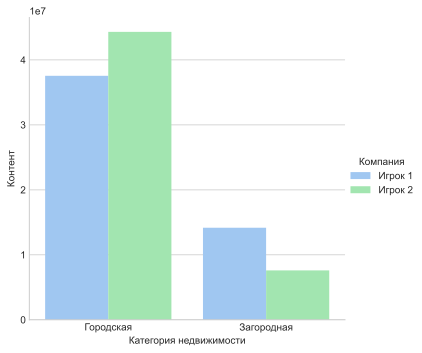

In [77]:
gg = df.groupby(["Компания", "Категория недвижимости"], as_index=False).sum()[["Компания", "Категория недвижимости", "Контент"]]
g = sns.catplot(x="Категория недвижимости", y="Контент", hue="Компания", data=gg, kind='bar')
# df.groupby(['Компания', 'Категория недвижимости']).sum()['Контент']['Игрок 2'].plot(kind='bar')


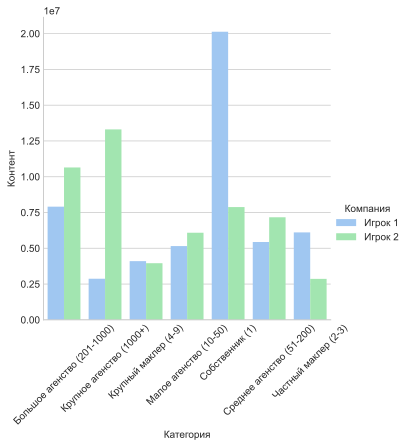

In [76]:
gg=df.groupby(["Компания", "Категория"], as_index=False).sum()[["Компания", "Категория", "Контент"]]
g = sns.catplot(x='Категория', y='Контент', hue="Компания", data=gg, kind='bar')
g.set_xticklabels(rotation=45)

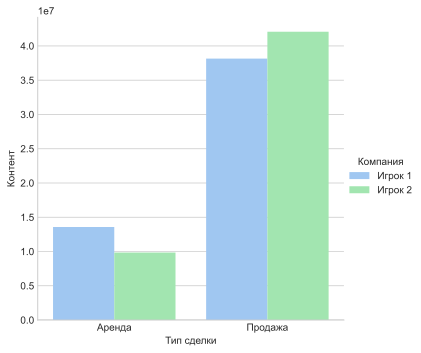

In [66]:
gg=df.groupby(["Компания", "Тип сделки"], as_index=False).sum()[["Компания", "Тип сделки", "Контент"]]

g = sns.catplot(x="Тип сделки", y="Контент", hue="Компания", data=gg, kind='bar')


In [80]:
%history -n 10
# %xmode Verbose

  10:
df.groupby(['Компания', 'Неделя']).sum()['Контент']['Игрок 1'].plot()
df.groupby(['Компания', 'Неделя']).sum()['Контент']['Игрок 2'].plot()
